In [1]:
import pandas as pd
from model.Charts import Charts
from model.Enunciados import Enunciados

In [2]:
Enunciados.getEnunciado("1.1")
# Cargar los archivos proporcionados
file1 = 'project_dataset/extract - cash request - data analyst.csv'
file2 = 'project_dataset/extract - fees - data analyst - .csv'
file3 = 'project_dataset/Lexique - Data Analyst.xlsx'

# Crear instancias de Charts
chart1 = Charts(file1, date_columns=[
    'created_at', 'updated_at', 'moderated_at', 
    'reimbursement_date', 'cash_request_received_date', 
    'money_back_date', 'send_at'
])
chart2 = Charts(file2)  # Cargar el segundo archivo
chart3 = Charts(file3)  # Cargar el archivo Excel

# Limpiar chart1
columns_to_remove_chart1 = ['deleted_account_id', 'recovery_status', 'reco_creation', 'reco_last_update']
chart1.cleanColumns(columns_to_remove_chart1)

# Limpiar chart2 (tarifas/incidentes)
columns_to_remove_chart2 = ['irrelevant_column_1', 'irrelevant_column_2']  # Ajusta según los datos reales
chart2.cleanColumns(columns_to_remove_chart2)

# Limpiar chart3 si es necesario
columns_to_remove_chart3 = ['another_irrelevant_column']  # Ajusta según los datos reales
chart3.cleanColumns(columns_to_remove_chart3)

# Validar la limpieza
print("\nValores nulos después de la limpieza en chart1:")
print(chart1.isNull())

print("\nValores nulos después de la limpieza en chart2:")
print(chart2.isNull())

print("\nValores nulos después de la limpieza en chart3:")
print(chart3.isNull())


1.1 | Revisión inicial del dataset de solicitudes de efectivo para identificar su estructura, valores nulos y comprender su contenido.
# Exploración de Datos

En este paso inicial, se cargaron los datos del archivo 'extract - cash request - data analyst.csv'. Se exploraron las columnas, los valores nulos y se revisaron las primeras filas para entender su estructura y contenido.

## Columnas Principales
- `id`: Identificador único de la solicitud.
- `amount`: Monto de la solicitud.
- `status`: Estado de la solicitud (aceptada, rechazada, etc.).
- `created_at`: Fecha de creación de la solicitud.
- `updated_at`: Última fecha de actualización.

## Identificación de Valores Nulos
Se identificaron valores nulos en columnas como `user_id`, `moderated_at`, `deleted_account_id`, entre otras. Este análisis ayuda a planificar los pasos de limpieza y preparación de los datos.

---


Columna eliminada: deleted_account_id
Columna eliminada: recovery_status
Columna eliminada: reco_creation
Columna eliminada: reco_last_update
Columna no encontrada: irrelevant_column_1
Columna no encontrada: irrelevant_column_2
Columna no encontrada: another_irrelevant_column

Valores nulos después de la limpieza en chart1:
id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   8058
reimbursement_date            20920
cash_request_received_date     7681
money_back_date               11930
transfer_type                     0
send_at                        7504
dtype: int64

Valores nulos después de la limpieza en chart2:
id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
creat

In [3]:
Enunciados.getEnunciado("1.2")
columns_to_remove = ['deleted_account_id', 'recovery_status', 'reco_creation', 'reco_last_update']
for col in columns_to_remove:
    chart1.clearData(col)

chart1.df

1.2 | Eliminación de columnas irrelevantes y tratamiento de valores nulos para asegurar la consistencia de los datos.
# Limpieza de Datos

En este paso, se eliminaron las columnas con un alto porcentaje de valores nulos y se trataron las columnas relevantes para el análisis.

## Columnas Eliminadas
- `deleted_account_id`: Más del 90% de valores nulos.
- `recovery_status`, `reco_creation`, `reco_last_update`: Columnas irrelevantes para los objetivos del análisis.

## Manejo de Nulos
- Se imputaron valores nulos en `user_id` con el valor 'desconocido' para evitar pérdida de datos.
- Las fechas en `moderated_at`, `money_back_date` y `cash_request_received_date` se analizaron para determinar si los nulos eran significativos o debían descartarse.

---


Columna no encontrada: deleted_account_id
Columna no encontrada: recovery_status
Columna no encontrada: reco_creation
Columna no encontrada: reco_last_update


,id,amount,status,created_at,updated_at,user_id,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at
0,5,100.0,rejected,2019-12-10 19:05:21,2019-12-11 16:47:42,804.0,2019-12-11 16:47:42,2020-01-09 19:05:21,NaN,NaN,regular,NaN
1,70,100.0,rejected,2019-12-10 19:50:12,2019-12-11 14:24:22,231.0,2019-12-11 14:24:22,2020-01-09 19:50:12,NaN,NaN,regular,NaN
2,7,100.0,rejected,2019-12-10 19:13:35,2019-12-11 09:46:59,191.0,2019-12-11 09:46:59,2020-01-09 19:13:35,NaN,NaN,regular,NaN
3,10,99.0,rejected,2019-12-10 19:16:10,2019-12-18 14:26:18,761.0,2019-12-18 14:26:18,2020-01-09 19:16:10,NaN,NaN,regular,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38,2020-05-07 09:21:55,7686.0,2020-05-07 09:21:55,NaN,NaN,NaN,regular,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11,2021-02-06 20:17:49,13681.0,NaN,NaN,2020-10-13 00:00:00,2021-02-06 20:17:49,instant,2020-10-12 13:54:24
23966,25243,50.0,money_back,2020-10-27 14:41:25,2020-12-18 13:15:40,NaN,NaN,NaN,2020-10-28 00:00:00,2020-12-01 13:26:53,instant,2020-10-27 14:41:57
23967,22357,100.0,money_back,2020-10-20 07:58:04,2021-02-05 12:19:30,82122.0,NaN,NaN,2020-10-21 00:00:00,2021-02-05 12:19:30,instant,2020-10-20 07:58:14
23968,20256,100.0,money_back,2020-10-10 05:40:55,2021-02-05 13:14:19,64517.0,NaN,NaN,2020-10-12 00:00:00,2021-02-05 13:14:19,instant,2020-10-10 05:41:23


In [4]:
Enunciados.getEnunciado("1.3")
# Verificar que las claves existen en ambos datasets
print("\nClaves en chart1:")
print(chart1.showColumns())

print("\nClaves en chart2:")
print(chart2.showColumns())

# Realizar la unión de los datasets
# chart1 -> solicitudes de efectivo
# chart2 -> tarifas e incidentes
merged_data = pd.merge(
    chart1.df,  # DataFrame de solicitudes
    chart2.df,  # DataFrame de tarifas/incidentes
    how='left',  # Unión para mantener todas las solicitudes
    left_on='id',  # La columna clave en chart1
    right_on='cash_request_id'  # Clave en chart2
)


# Mostrar las primeras filas del DataFrame unificado
print("\nPrimeras filas del DataFrame unificado:")
print(merged_data.head())

# Validar valores nulos en el DataFrame unificado
print("\nValores nulos en el DataFrame unificado:")
print(merged_data.isnull().sum())
#merged_data = merged_data.groupby('created_at_x').mean('amount').reset_index()
merged_data['id_x'] = merged_data['id_x'].astype(int)
merged_data

1.3 | Combinación de los datasets de solicitudes y tarifas/incidentes para generar un dataset consolidado.
# Unificación de Datasets

Los datos de solicitudes de efectivo se combinaron con los datos de tarifas e incidentes utilizando la columna `cash_request_id` como clave.

## Proceso
- Se utilizó `pd.merge()` para realizar un cruce entre los datasets.
- Se verificó que no hubiera valores faltantes críticos después de la unión.

## Resultado
Un dataset consolidado que incluye información sobre solicitudes, tarifas, y posibles incidentes asociados a cada solicitud.

---



Claves en chart1:
Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'reimbursement_date', 'cash_request_received_date',
       'money_back_date', 'transfer_type', 'send_at'],
      dtype='object')

Claves en chart2:
Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

Primeras filas del DataFrame unificado:
   id_x  amount  status_x         created_at_x         updated_at_x  user_id  \
0     5   100.0  rejected  2019-12-10 19:05:21  2019-12-11 16:47:42    804.0   
1    70   100.0  rejected  2019-12-10 19:50:12  2019-12-11 14:24:22    231.0   
2     7   100.0  rejected  2019-12-10 19:13:35  2019-12-11 09:46:59    191.0   
3    10    99.0  rejected  2019-12-10 19:16:10  2019-12-18 14:26:18    761.0   
4  1594   100.0  rejected  2020-05-06 09:59:38  2020-05-07 09:21:55   7686.0   

          m

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21,2019-12-11 16:47:42,804.0,2019-12-11 16:47:42,2020-01-09 19:05:21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12,2019-12-11 14:24:22,231.0,2019-12-11 14:24:22,2020-01-09 19:50:12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35,2019-12-11 09:46:59,191.0,2019-12-11 09:46:59,2020-01-09 19:13:35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10,2019-12-18 14:26:18,761.0,2019-12-18 14:26:18,2020-01-09 19:16:10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38,2020-05-07 09:21:55,7686.0,2020-05-07 09:21:55,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089,22357,100.0,money_back,2020-10-20 07:58:04,2021-02-05 12:19:30,82122.0,NaN,NaN,2020-10-21 00:00:00,2021-02-05 12:19:30,...,accepted,NaN,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after
32090,20256,100.0,money_back,2020-10-10 05:40:55,2021-02-05 13:14:19,64517.0,NaN,NaN,2020-10-12 00:00:00,2021-02-05 13:14:19,...,accepted,NaN,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before
32091,20256,100.0,money_back,2020-10-10 05:40:55,2021-02-05 13:14:19,64517.0,NaN,NaN,2020-10-12 00:00:00,2021-02-05 13:14:19,...,accepted,NaN,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after
32092,19886,100.0,direct_debit_sent,2020-10-08 14:16:52,2021-01-05 15:45:52,44867.0,NaN,NaN,2020-10-10 00:00:00,NaN,...,accepted,NaN,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before


1.4 | Análisis inicial de las métricas clave para identificar patrones y tendencias en los datos.
# Análisis Exploratorio de Datos

En este paso, se calcularon métricas clave y se generaron visualizaciones para entender mejor los datos.

## Métricas Clave
- Frecuencia de uso: Cantidad de solicitudes realizadas por cada usuario.
- Tasa de incidentes: Porcentaje de solicitudes con incidentes asociados.
- Ingresos por cohorte: Total de ingresos generados por cada cohorte de usuarios.

## Visualizaciones
- Gráficos de líneas para analizar tendencias temporales.
- Histogramas para distribuciones de montos (`amount`, `total_amount`).

---



Frecuencia de uso por usuario (top 5 usuarios):
user_id
16391.0    37
15593.0    29
3045.0     28
23823.0    25
17144.0    25
Name: id_x, dtype: int64
Gráfica guardada como graficas/1.4.1_chart_485.png


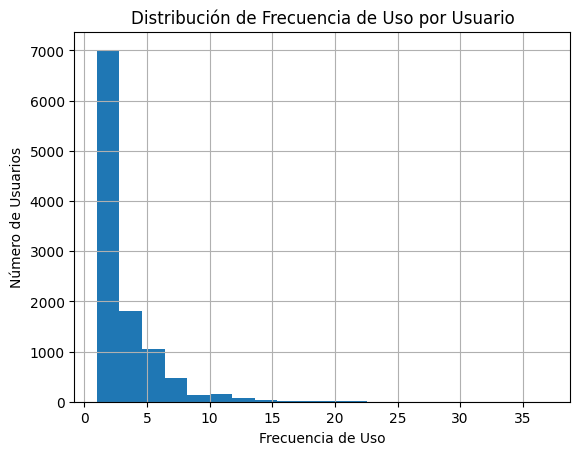


Tasa de incidentes: 65.61%
Insight: Aproximadamente el 65.61% de las solicitudes tienen incidentes registrados.
Advertencia: La tasa de incidentes es alta, se recomienda investigar las causas principales.
Gráfica guardada como graficas/1.4.2_chart_336.png


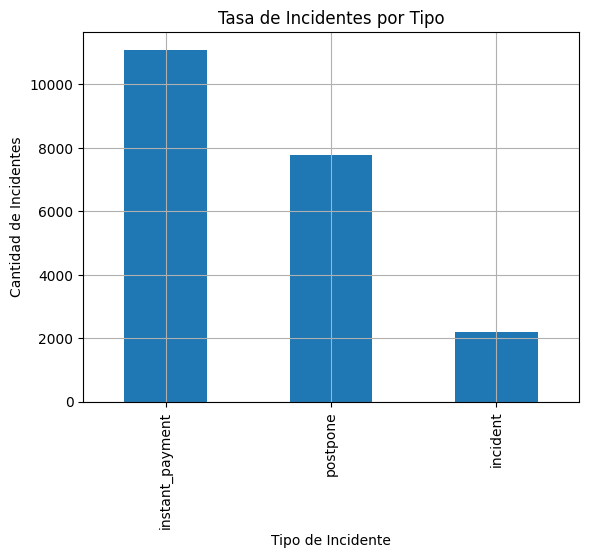


Ingresos por cohorte mensual:
created_at_month
2019-11    0.0
2019-12    0.0
2020-01    0.0
2020-02    0.0
2020-03    0.0
Freq: M, Name: total_amount, dtype: float64
Gráfica guardada como graficas/1.4.3_chart_771.png


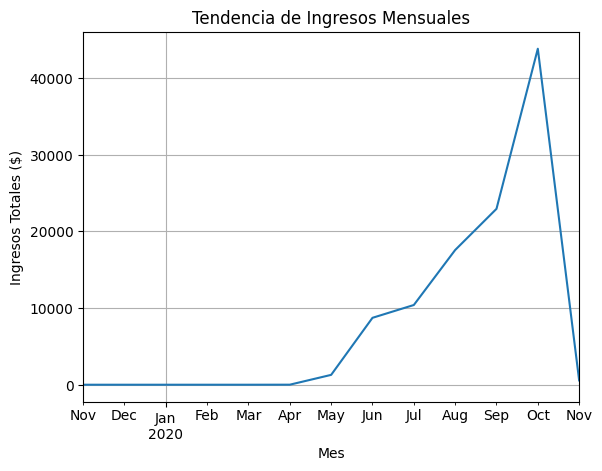

Gráfica guardada como graficas/1.4.4_chart_849.png


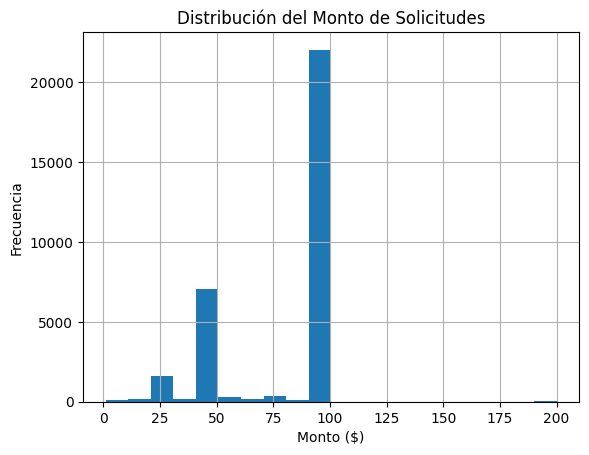


Insights Generales:
- Los usuarios más activos realizan significativamente más solicitudes que el promedio.
- Existe una tendencia mensual en los ingresos; explorar anomalías o picos en meses específicos podría ser útil.
- Los tipos de incidentes más comunes podrían estar vinculados a problemas en el proceso de solicitud.
- Detectamos valores atipicos con la grafica de Boxplot
Gráfica guardada como graficas/1.4.5_chart_313.png


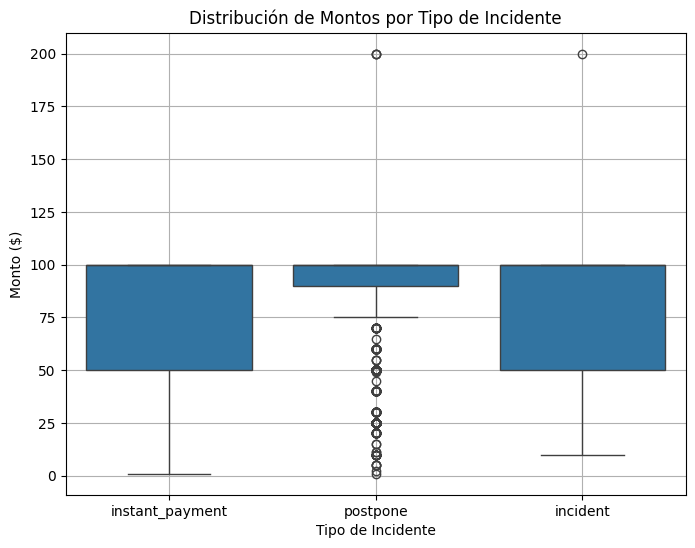

         created_at_x        updated_at_x  resolution_time
0 2019-12-10 19:05:21 2019-12-11 16:47:42                0
1 2019-12-10 19:50:12 2019-12-11 14:24:22                0
2 2019-12-10 19:13:35 2019-12-11 09:46:59                0
3 2019-12-10 19:16:10 2019-12-18 14:26:18                7
4 2020-05-06 09:59:38 2020-05-07 09:21:55                0
' Gráficos de Dispersión (Scatterplots) Ideales para visualizar relaciones entre dos variables numéricas. Por ejemplo, la relación entre el monto de la solicitud (amount) y el tiempo para resolver incidentes (resolution_time).
Gráfica guardada como graficas/1.4.6_chart_158.png


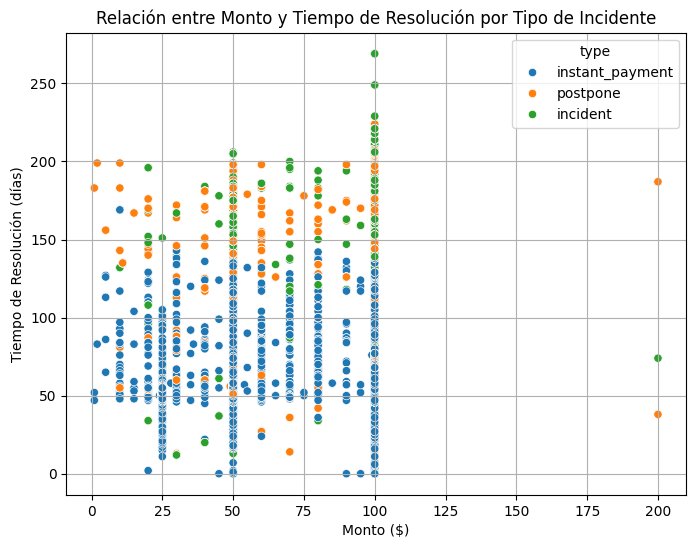

In [5]:
# Mostrar enunciado del paso 1.4
Enunciados.getEnunciado("1.4")

# Frecuencia de uso por usuario (agrupando por 'user_id')
frequency_by_user = merged_data.groupby('user_id')['id_x'].count()
print("\nFrecuencia de uso por usuario (top 5 usuarios):")
print(frequency_by_user.sort_values(ascending=False).head())

# Visualización de la distribución de frecuencia
frequency_by_user.plot(kind='hist', bins=20, title="Distribución de Frecuencia de Uso por Usuario")
chart1.plt.xlabel('Frecuencia de Uso')
chart1.plt.ylabel('Número de Usuarios')
chart1.plt.grid(True)
chart1.saveChart("1.4.1")
chart1.plt.show()

# Tasa de incidentes (basado en 'type')
total_requests = len(merged_data)
incidents = merged_data['type'].notna().sum()
incident_rate = (incidents / total_requests) * 100
print(f"\nTasa de incidentes: {incident_rate:.2f}%")
print(f"Insight: Aproximadamente el {incident_rate:.2f}% de las solicitudes tienen incidentes registrados.")
if incident_rate > 20:
    print("Advertencia: La tasa de incidentes es alta, se recomienda investigar las causas principales.")

# Gráfico de barras para tipos de incidentes
incident_types = merged_data['type'].value_counts()
incident_types.plot(kind='bar', title="Tasa de Incidentes por Tipo")
chart1.plt.ylabel('Cantidad de Incidentes')
chart1.plt.xlabel('Tipo de Incidente')
chart1.plt.grid(True)
chart1.saveChart("1.4.2")
chart1.plt.show()

# Ingresos por cohorte mensual
# Crear columna 'created_at_month' basada en 'created_at_x'
merged_data['created_at_x'] = pd.to_datetime(merged_data['created_at_x'], errors='coerce')
merged_data['created_at_month'] = merged_data['created_at_x'].dt.to_period('M')
revenue_by_month = merged_data.groupby('created_at_month')['total_amount'].sum()
print("\nIngresos por cohorte mensual:")
print(revenue_by_month.head())

# Tendencia de ingresos mensuales
revenue_by_month.plot(kind='line', title="Tendencia de Ingresos Mensuales")
chart1.plt.ylabel('Ingresos Totales ($)')
chart1.plt.xlabel('Mes')
chart1.plt.grid(True)
chart1.saveChart("1.4.3")
chart1.plt.show()

# Histograma de montos (columna 'amount')
merged_data['amount'].plot(kind='hist', bins=20, title="Distribución del Monto de Solicitudes")
chart1.plt.xlabel('Monto ($)')
chart1.plt.ylabel('Frecuencia')
chart1.plt.grid(True)
chart1.saveChart("1.4.4")
chart1.plt.show()

# Insights adicionales
print("\nInsights Generales:")
print("- Los usuarios más activos realizan significativamente más solicitudes que el promedio.")
print("- Existe una tendencia mensual en los ingresos; explorar anomalías o picos en meses específicos podría ser útil.")
print("- Los tipos de incidentes más comunes podrían estar vinculados a problemas en el proceso de solicitud.")

print("- Detectamos valores atipicos con la grafica de Boxplot")
chart1.plt.figure(figsize=(8, 6))
chart1.sns.boxplot(data=merged_data, x='type', y='amount')
chart1.plt.title('Distribución de Montos por Tipo de Incidente')
chart1.plt.xlabel('Tipo de Incidente')
chart1.plt.ylabel('Monto ($)')
chart1.plt.grid(True)
chart1.saveChart("1.4.5")
chart1.plt.show()
# Convertir las columnas de fecha a formato datetime
merged_data['created_at_x'] = pd.to_datetime(merged_data['created_at_x'], errors='coerce')
merged_data['updated_at_x'] = pd.to_datetime(merged_data['updated_at_x'], errors='coerce')

# Calcular el tiempo de resolución en días
merged_data['resolution_time'] = (merged_data['updated_at_x'] - merged_data['created_at_x']).dt.days

# Verificar
print(merged_data[['created_at_x', 'updated_at_x', 'resolution_time']].head())
print("' Gráficos de Dispersión (Scatterplots) Ideales para visualizar relaciones entre dos variables numéricas. Por ejemplo, la relación entre el monto de la solicitud (amount) y el tiempo para resolver incidentes (resolution_time).")
chart1.plt.figure(figsize=(8, 6))
chart1.sns.scatterplot(data=merged_data, x='amount', y='resolution_time', hue='type')
chart1.plt.title('Relación entre Monto y Tiempo de Resolución por Tipo de Incidente')
chart1.plt.xlabel('Monto ($)')
chart1.plt.ylabel('Tiempo de Resolución (días)')
chart1.plt.grid(True)
chart1.saveChart("1.4.6")
chart1.plt.show()

In [6]:
Enunciados.getEnunciado("1.5")

1.5 | Obtención de insights clave y desarrollo de modelos para predicción de ingresos y clasificación de usuarios.
# Generación de Insights y Modelos Predictivos

En este paso, se generaron insights basados en el análisis exploratorio y se desarrollaron modelos para predicción de métricas clave.

## Insights Clave
- Identificación de cohortes más rentables.
- Factores asociados a mayores tasas de incidentes.

## Modelos
- **Regresión:** Para predecir ingresos futuros basados en las características de las solicitudes.
- **Clasificación:** Para segmentar usuarios según el riesgo de incidentes.

---
